# Machine Learning

## Homework 3

## 20Newsgroup

1. Sklearn library made convinient to import dataset to this project which already present in the Sklearn library from sklearn.datasets import fetch_20newsgroups. 



### 1.0 Challenges faced in the project










### Field reference
Refer to the following import for a complete listing and description of the fields currently included
in the database: from sklearn.datasets import fetch_20newsgroups
### Direct Data Imported

from sklearn.datasets import fetch_20newsgroups

#### Programming Tasks
Author the python code necessary to answer the following questions:

#### Question-1: How well does it answer question?


#### Question-2: Do 20 clusteres actually pick up one newspaper?


#### Question-3: What happens with 15 or 25 clusters?


# 2.0 Necessary imports

In [46]:
import nltk

import wordcloud

from sklearn.datasets import fetch_20newsgroups # It import the dataset

from nltk.tokenize import word_tokenize 
# Used to extract words from documents
# Tokenization is essentially splitting a phrase, sentence, paragraph, 
# or an entire text document into smaller units, 
# such as individual words or terms. Each of these smaller units are called tokens.
# Words likes "and" "the" "is" "are" "him" presumed to be uniformative

from nltk.stem import WordNetLemmatizer #Used to lemmatize words 
# Lemmatization is the process of grouping together 
# the different inflected forms of a word so they can be analyzed as a single item.

from sklearn.feature_extraction.text import TfidfVectorizer # new one on sklearn
# Convert a collection of raw document to a matrix of TF-IDF features
# So if you are using TfidfVectorize then you dont need CountVectorizer and TfidfTranformer
# SO it will do Vectoreinzation, counting, Normelization as well

# Count Vectorizer give number of frequency with respect to index of 
# vocabulary where as tf-idf consider overall documents of weight of words.

from sklearn.pipeline import make_pipeline 
# It set the name to the lowercase of their type automatically

from sklearn.preprocessing import Normalizer
# Normalize samples individually to unit norm. Each sample (i.e. each row of the data matrix) with at least one non zero component
# is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

from sklearn import metrics


from sklearn.cluster import KMeans

import sys
from time import time
import seaborn as sns
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/anshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
#categories = [
#    'talk.religion.misc',
#    'comp.graphics',
#    'sci.space',
#]
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


print("Loaded 20 newsgroups dataset for categories:",categories)

Loaded 20 newsgroups dataset for categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


# 3.0 Import Dataset and remove headers, footers and quotes

In [49]:
df = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [50]:
labels = df.target
true_k = len(np.unique(labels)) 
print(true_k)

20


# 4.0 Lemmatizer

In [51]:
len(df.data)

18846

In [52]:
word_list = word_tokenize(df.data[1])
word_list

['Well',
 ',',
 'I',
 'just',
 'got',
 'my',
 'Centris',
 '610',
 'yesterday',
 '.',
 'It',
 'took',
 'just',
 'over',
 'two',
 'weeks',
 'from',
 'placing',
 'the',
 'order',
 '.',
 'The',
 'dealer',
 '(',
 'Rutgers',
 'computer',
 'store',
 ')',
 'appologized',
 'because',
 'Apple',
 'made',
 'a',
 'substitution',
 'on',
 'my',
 'order',
 '.',
 'I',
 'ordered',
 'the',
 'one',
 'without',
 'ethernet',
 ',',
 'but',
 'they',
 'substituted',
 'one',
 '_with_',
 'ethernet',
 '.',
 'He',
 'wanted',
 'to',
 'know',
 'if',
 'that',
 'would',
 'be',
 '``',
 'alright',
 'with',
 'me',
 "''",
 '!',
 '!',
 '!',
 'They',
 'must',
 'be',
 'backlogged',
 'on',
 'Centri',
 'w/out',
 'ethernet',
 'so',
 'they',
 "'re",
 'just',
 'shipping',
 'them',
 'with',
 '!',
 'Anyway',
 ',',
 'I',
 "'m",
 'very',
 'happy',
 'with',
 'the',
 '610',
 'with',
 'a',
 'few',
 'exceptions',
 '.',
 'Being',
 'nosy',
 ',',
 'I',
 'decided',
 'to',
 'open',
 'it',
 'up',
 '_before_',
 'powering',
 'it',
 'on',
 'for',

In [53]:
df.data[1]

'Well, I just got my Centris 610 yesterday.  It took just over two \nweeks from placing the order.  The dealer (Rutgers computer store) \nappologized because Apple made a substitution on my order.  I ordered\nthe one without ethernet, but they substituted one _with_ ethernet.\nHe wanted to know if that would be "alright with me"!!!  They must\nbe backlogged on Centri w/out ethernet so they\'re just shipping them\nwith!  \n\n\tAnyway, I\'m very happy with the 610 with a few exceptions.  \nBeing nosy, I decided to open it up _before_ powering it on for the first\ntime.  The SCSI cable to the hard drive was only partially connected\n(must have come loose in shipping).  No big deal, but I would have been\npissed if I tried to boot it and it wouldn\'t come up!\n\tThe hard drive also has an annoying high pitched whine.  I\'ve\nheard apple will exchange it if you complain, so I might try to get\nit swapped.\n\tI am also dissappionted by the lack of soft power-on/off.  This\nwasn\'t mentioned 

In [54]:
lemmatized_doc = ""
for word in word_list:
    lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
lemmatized_doc
# lemmatizer create the extra space in between the punctuations

" Well , I just got my Centris 610 yesterday . It took just over two week from placing the order . The dealer ( Rutgers computer store ) appologized because Apple made a substitution on my order . I ordered the one without ethernet , but they substituted one _with_ ethernet . He wanted to know if that would be `` alright with me '' ! ! ! They must be backlogged on Centri w/out ethernet so they 're just shipping them with ! Anyway , I 'm very happy with the 610 with a few exception . Being nosy , I decided to open it up _before_ powering it on for the first time . The SCSI cable to the hard drive wa only partially connected ( must have come loose in shipping ) . No big deal , but I would have been pissed if I tried to boot it and it would n't come up ! The hard drive also ha an annoying high pitched whine . I've heard apple will exchange it if you complain , so I might try to get it swapped . I am also dissappionted by the lack of soft power-on/off . This wa n't mentioned in any of the 

In [55]:
lemmatizer = WordNetLemmatizer()
for i in range(len(df.data)):
    word_list = word_tokenize(df.data[i])
    lemmatized_doc = ""
    for word in word_list:
        lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
    df.data[i] = lemmatized_doc 

In [56]:
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) ## Corpus is in English
X = vectorizer.fit_transform(df.data)

In [57]:
X[0, 0:10]

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [58]:
print(X.shape)###

(18846, 49381)


In [59]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=100)

y_pred = km.fit_predict(X)


In [17]:
y_pred

array([ 4,  5, 19, ...,  4, 18,  4], dtype=int32)

In [18]:
labels.shape

(18846,)

In [19]:
y_pred.shape

(18846,)

In [20]:
t =np.stack((y_pred, labels))
print(t.shape)

(2, 18846)


In [21]:
labels.shape

(18846,)

In [22]:
# Bag of Words: Vectrization, Counting and Tokenization 
# Ignoring relative positon information of the words in the document


centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: getting know just like ha ve wa way problem think
Cluster 1: israel people jews israeli space arab think right ha wa
Cluster 2: thanks know advance does hi help mail info looking anybody
Cluster 3: god jesus sin believe faith wa belief say doe bible
Cluster 4: just ha like know use doe think good time new
Cluster 5: drive scsi disk ide hard controller floppy problem cd meg
Cluster 6: file format image program gif windows ftp directory convert use
Cluster 7: window windows program dos font server application problem running run
Cluster 8: mail list address send edu email mailing post information com
Cluster 9: dsl n3jxp chastity cadre geb intellect skepticism shameful banks pitt
Cluster 10: queens beauchaine bobbe bronx sank ico manhattan blew tek vice
Cluster 11: game team player wa year hockey play baseball season win
Cluster 12: wa did think year just know time like said ha
Cluster 13: gun government people law right wa armenian crime armenians weapon
Cluster 14: bike ride

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [24]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [25]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

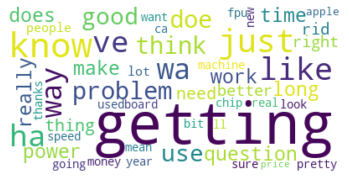

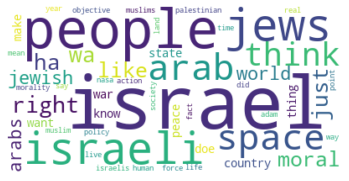

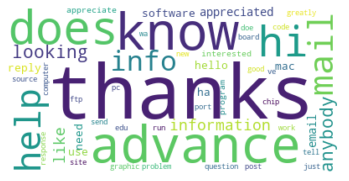

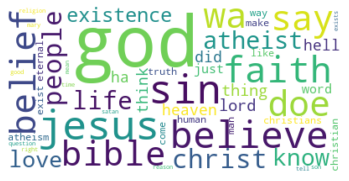

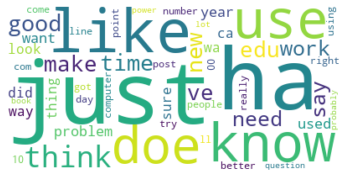

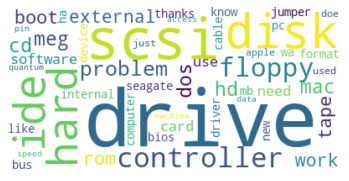

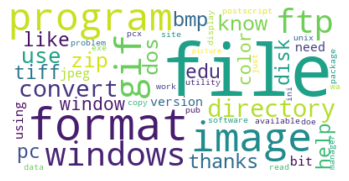

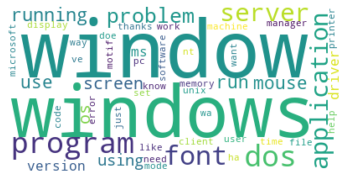

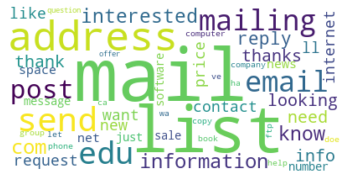

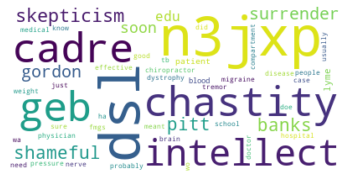

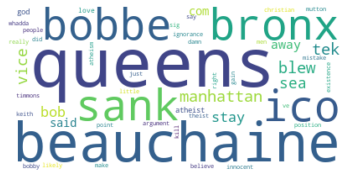

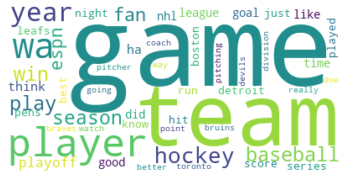

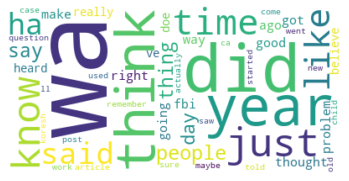

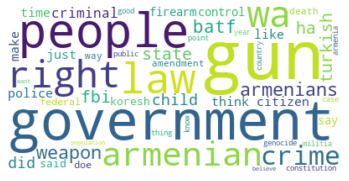

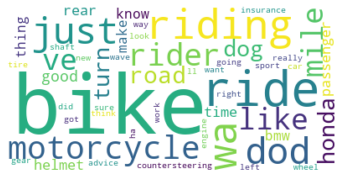

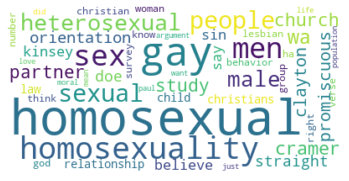

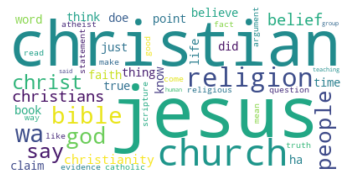

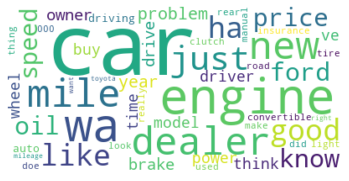

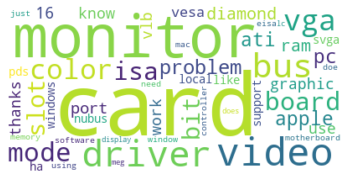

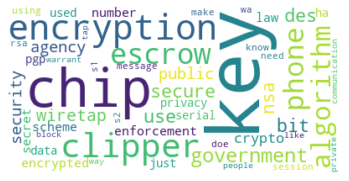

In [26]:
for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

In [27]:
from sklearn.metrics import confusion_matrix
tconf = confusion_matrix(y_pred, labels)
tconf

array([[  6,   5,  10,  21,  31,   7,   4,  14,  24,  14,   5,  11,  19,
         19,  14,   2,  14,  15,  11,   5],
       [ 89,   2,   5,   0,   2,   2,   1,   8,   2,   3,   6,  15,   0,
         11, 134,  12,  12, 405,  56,  41],
       [  7, 159,  62, 105, 125, 105,  43,  31,  18,  24,  13,  14, 106,
         49,  21,  16,   5,   3,   4,   3],
       [ 88,   0,   1,   0,   0,   0,   0,   0,   2,   1,   1,   0,   1,
          4,   0, 202,   3,   7,   0,  60],
       [310, 417, 288, 330, 484, 409, 607, 435, 512, 452, 325, 418, 682,
        630, 605, 208, 317, 251, 343, 257],
       [  0,   0,  26, 190, 110,   1,  76,   2,  12,   0,   0,   0,  14,
          0,   0,   0,   0,   0,   2,   0],
       [  2, 182, 150,  18,  13,  72,   2,   1,   1,   2,   1,  14,   7,
          0,  12,   1,   3,   1,   0,   1],
       [  0,  44, 316,  53,  24, 314,  17,   2,   1,   0,   0,   6,  18,
          2,   1,   1,   1,   0,   0,   0],
       [ 10,  54,  35,  36,  30,  38, 100,  17,  18,  36,  19,  

In [28]:
z =np.amax(tconf, 1)

In [29]:
z.sum()

5054

#### Question-3: What happens with 15 or 25 clusters?

##### Answer-3: For 25 and 15 clusters they also pick up one news paper. 



In [30]:
# Tested with n = 25 
km = KMeans(n_clusters=25, init='k-means++', max_iter=100)

y_pred = km.fit_predict(X)

In [31]:
from sklearn.metrics import confusion_matrix
tconf = confusion_matrix(y_pred, labels)
tconf

array([[  3,   0,   0,   1,   0,   0,  15, 355,  22,   0,   1,   0,  22,
          0,   2,   0,   2,   0,   3,   2,   0,   0,   0,   0,   0],
       [  4,  69,  25, 202, 316,  18,  33,   3,   2,   0,   0,  56, 218,
          7, 321,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [ 87,   0,   1,   0,   0,   0,   0,   0,   2,   1,   1,   0,   1,
          4,   0, 202,   3,   7,   0,  60,   0,   0,   0,   0,   0],
       [ 19,   0,   0,   0,   0,   0,   0,  10,   9,   0,   0, 116,   5,
          3,  19,   4, 378,  18, 166,  35,   0,   0,   0,   0,   0],
       [  0,  50,  75, 153,  51,   6,  29,   0,   1,   0,   2,   1,  11,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [332, 246, 197, 131, 197, 236, 199, 421, 494, 342, 240, 345, 419,
        612, 416, 220, 318, 310, 369, 267,   0,   0,   0,   0,   0],
       [  4,  45,  32,  18,  30,  31,   5,  15,   7,  15,   4,   9,  43,
         22,   4,  10,   4,   6,   2,   4,   0,   0,   0,   0,   0],
      

In [32]:
z =np.amax(tconf, 1)

In [33]:
z

array([355, 321, 202, 378, 153, 612,  45, 142, 184,  86, 165, 473, 312,
        71,  37, 332, 270, 120, 443, 349,  98,  68, 130, 409, 238])

In [34]:
z.sum()/len(y_pred)

0.3179985142735859

In [41]:
# Tested with n = 15
km15 = KMeans(n_clusters=15, init='k-means++', max_iter=100)

y_pred15 = km15.fit_predict(X)

In [42]:
from sklearn.metrics import confusion_matrix
tconf15 = confusion_matrix(y_pred15, labels)
tconf15

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2,   2, 446,   1,   3],
       [  2, 190, 159,  16,  13,  76,   2,   1,   1,   1,   1,  15,   7,
          0,  10,   1,   3,   2,   0,   0],
       [ 69,  87,  63,  87, 150,  56,  57, 117, 421,  91,  41, 103, 235,
        257, 343,  46,  39,  31,  56,  44],
       [ 10, 278, 102, 193, 226, 193, 272,  44,  32,  48,  23,  50, 180,
         98,  80,  32,  10,   7,  11,  10],
       [135,   0,   1,   0,   0,   0,   0,   0,   2,   1,   1,   0,   1,
          4,   0, 423,   3,   8,   1, 120],
       [318, 264, 218, 202, 304, 320, 362, 338, 371, 393, 279, 290, 427,
        490, 375, 272, 284, 286, 290, 267],
       [  0,  63,  77, 196, 109,   8,  52,   0,   0,   0,   2,   1,  15,
          0,   0,   0,   1,   0,   0,   0],
       [  0,   4,   1,   2,   1,   4,  78,   2,   0,   9,  50,   2,   1,
          2,   3,   0,   4,   3,   1,   0],
       [  2,   2,   3,   3,   3,  14,   1,   1,   0,   1,   0, 3

In [43]:
z =np.amax(tconf, 1)

In [44]:
z

array([406, 344, 511, 168, 191, 513, 266, 137,  71, 172, 156, 421, 460,
       684, 389,   0,   0,   0,   0,   0])

In [45]:
z.sum()/len(y_pred)

0.2594184442321978

### Reference: https://www.kaggle.com/aybukehamideak/clustering-text-documents-using-k-means